# Brain Stroke Data Analysis

# Objective: *Prediction of whether a person is likely to get Brain Stroke*

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# About the Data:
***What is Brain Stroke?***<br>
A stroke is a medical condition in which poor blood flow to the brain causes cell death.  Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

# Features of the data:
***Predictors***<br><br>
**1.Gender**:Male and Female<br>
**2.Age**<br>
**3.Hypertension**:0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
**4.Heart_disease**:0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
**5.ever_married**:"No" or "Yes"<br>
**6.work_type**: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" <br>
**7.Residencetype**: "Rural" or "Urban"<br>
**8.avg_glucose_level**: average glucose level in blood<br>
**9.bmi**: body mass index<br>
**10.smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"<br><br>
***predicted/Response variable<br>***
**stroke**: 1 if the patient had a stroke or 0 if not<br>
<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


# Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
brn=pd.read_csv("E:/brain_stroke.csv")

# EDA

In [3]:
brn.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
brn.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
brn.shape

(4981, 11)

In [6]:
brn.size

54791

In [7]:
brn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
brn.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
brn.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
brn.stroke.unique()

array([1, 0], dtype=int64)

In [11]:
brn.nunique()


gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [12]:
brn.loc[(brn.gender=="Male") & (brn.stroke==1),["gender","stroke"]]

,gender,stroke
0,Male,1
1,Male,1
4,Male,1
5,Male,1
13,Male,1
...,...,...
4814,Male,1
4815,Male,1
4816,Male,1
4818,Male,1


In [13]:
brn.loc[(brn.gender=="Female") & (brn.stroke==1),["gender","stroke"]]

,gender,stroke
2,Female,1
3,Female,1
6,Female,1
7,Female,1
8,Female,1
...,...,...
4810,Female,1
4811,Female,1
4812,Female,1
4813,Female,1


# Checking the missing/null values

In [14]:
brn.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
brn.duplicated().sum()

0

# Data Visualization

<AxesSubplot:title={'center':'boxplot for Age'}>

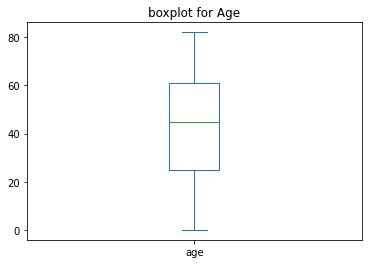

In [16]:
brn["age"].plot(kind="box",title="boxplot for Age")

<AxesSubplot:>

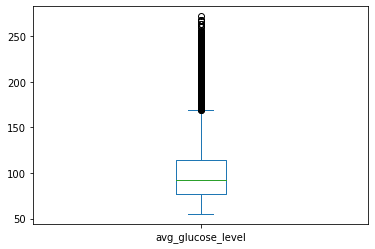

In [17]:
brn["avg_glucose_level"].plot(kind="box")

<AxesSubplot:title={'center':'Boxplot for Average Glucose Level'}>

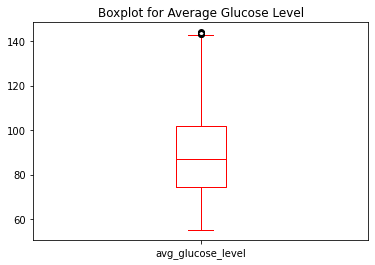

In [18]:
brn.loc[brn.avg_glucose_level<144,"avg_glucose_level"].plot(kind="box",color="r",title="Boxplot for Average Glucose Level")

<AxesSubplot:>

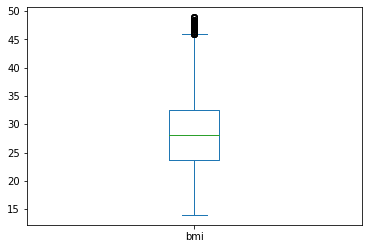

In [19]:
brn["bmi"].plot(kind="box")

<AxesSubplot:title={'center':'Boxplot for BMI'}>

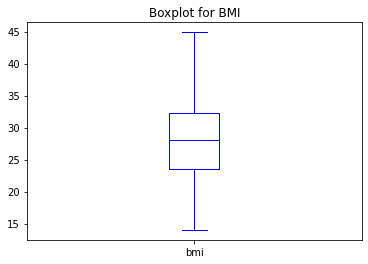

In [20]:
brn.loc[brn.bmi<45,"bmi"].plot(kind="box",color="b",title="Boxplot for BMI")


In [21]:
brn=brn[brn.avg_glucose_level<144]
brn=brn[brn.bmi<45]

In [22]:
brn.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='work_type', ylabel='avg_glucose_level'>

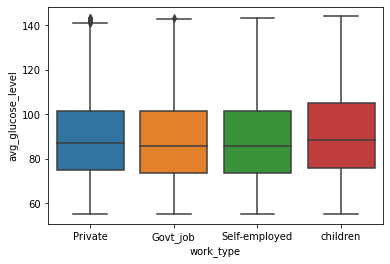

In [23]:
sns.boxplot(data=brn,x="work_type",y="avg_glucose_level")


<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

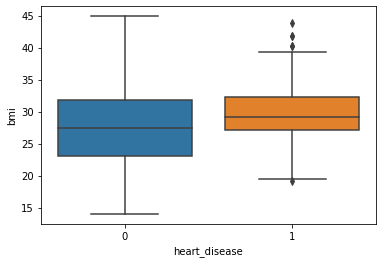

In [24]:
sns.boxplot(data=brn,x="heart_disease",y="bmi")


In [25]:
df= brn.drop(['age','avg_glucose_level','bmi'],axis=1)
for i in df.columns:
    print(df[i].nunique())

2
2
2
2
4
2
4
2


In [26]:
for i in df.columns:
    print(df[i].value_counts())

Female    2475
Male      1705
Name: gender, dtype: int64
0    3872
1     308
Name: hypertension, dtype: int64
0    4015
1     165
Name: heart_disease, dtype: int64
Yes    2607
No     1573
Name: ever_married, dtype: int64
Private          2374
children          642
Self-employed     635
Govt_job          529
Name: work_type, dtype: int64
Urban    2114
Rural    2066
Name: Residence_type, dtype: int64
never smoked       1521
Unknown            1344
formerly smoked     676
smokes              639
Name: smoking_status, dtype: int64
0    4024
1     156
Name: stroke, dtype: int64


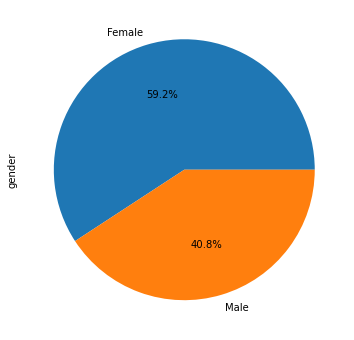

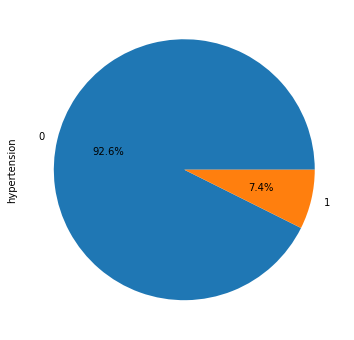

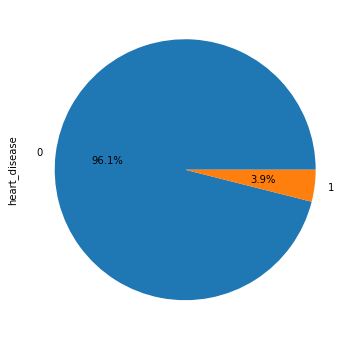

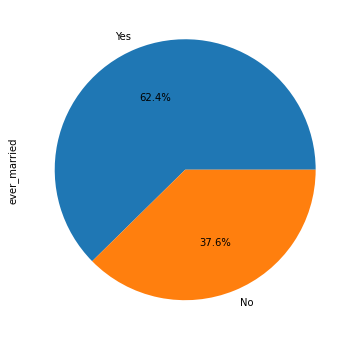

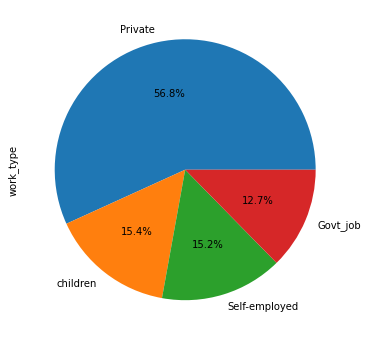

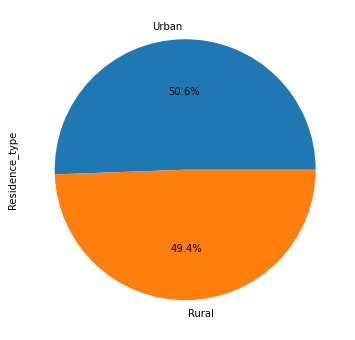

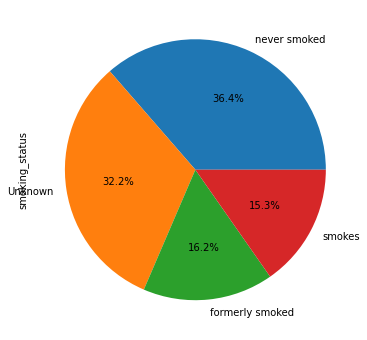

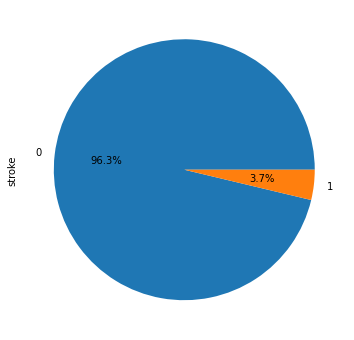

In [27]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    df[i].value_counts().plot(kind='pie',autopct='%1.1f%%')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

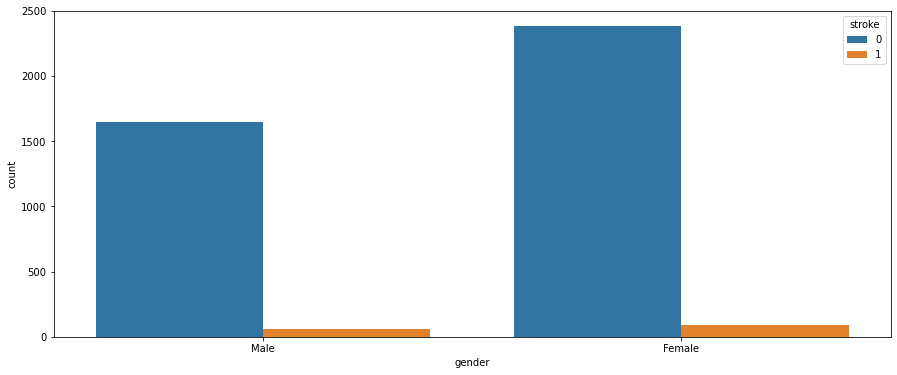

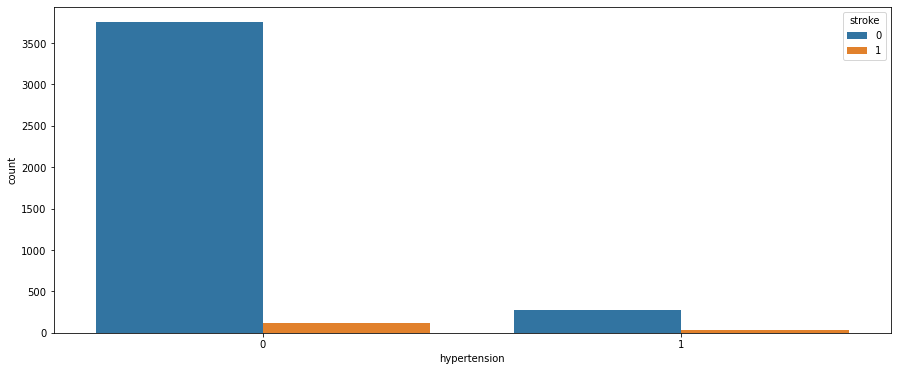

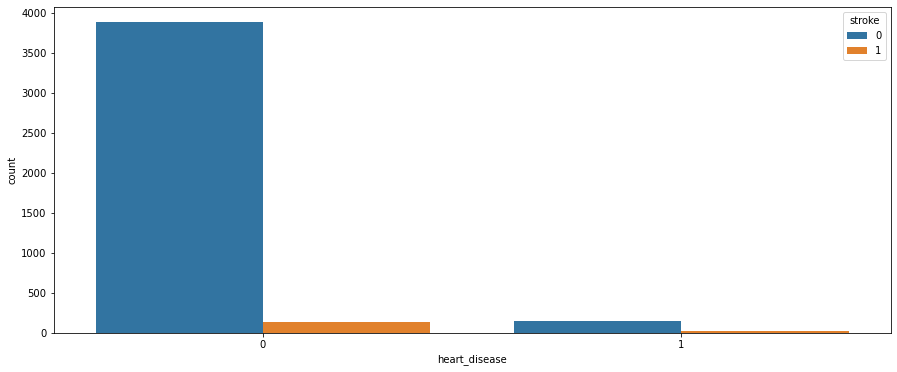

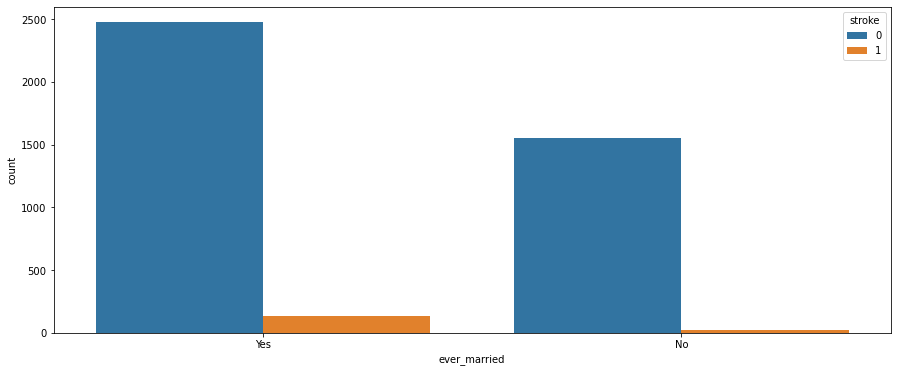

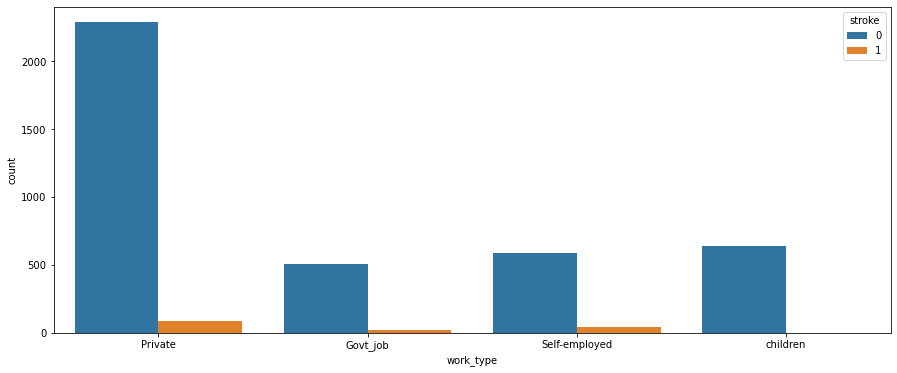

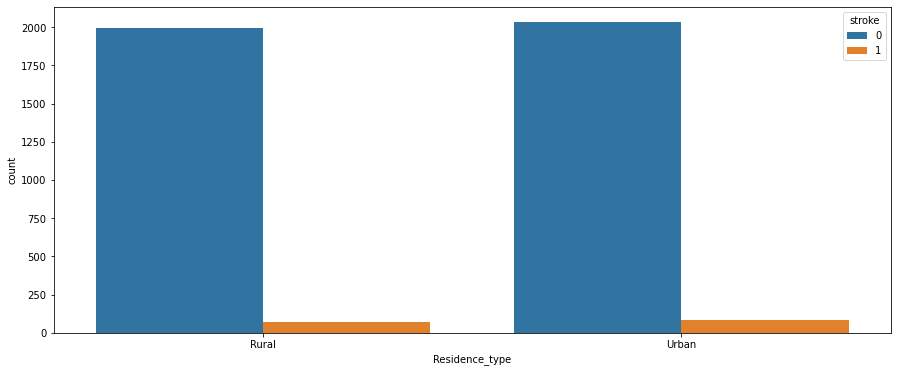

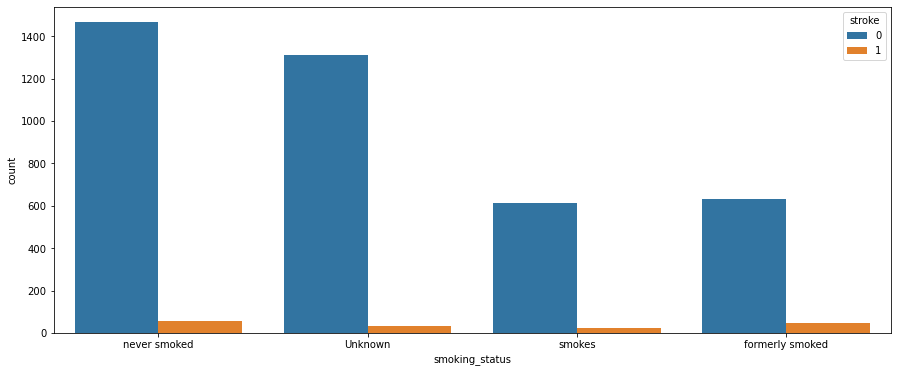

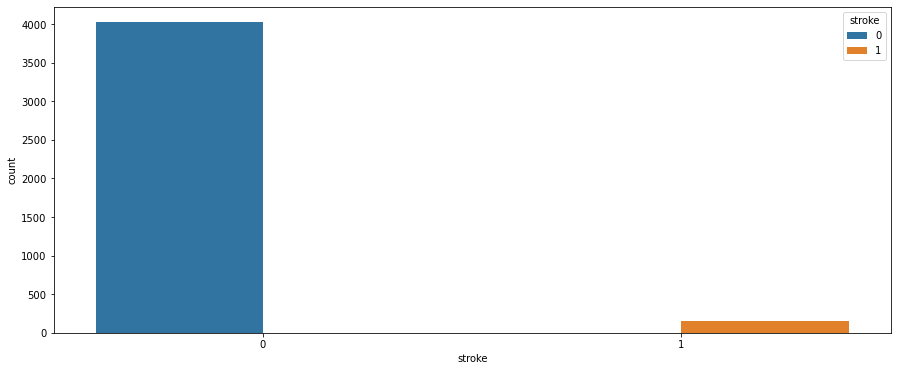

In [28]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(df[i],data=df,hue='stroke')

<AxesSubplot:ylabel='stroke'>

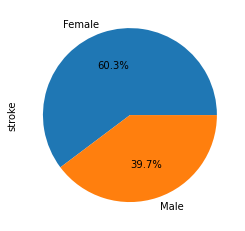

In [29]:
Gender=df.groupby(['gender'])['stroke'].sum()
Gender.plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='stroke'>

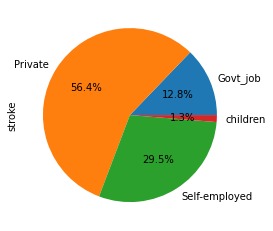

In [30]:
worktype=df.groupby(['work_type'])['stroke'].sum()
worktype.plot(kind='pie',autopct='%1.1f%%')
#People who work in private seconds have increase proportion of being diagnosed with stroke (59.7%)

<AxesSubplot:ylabel='stroke'>

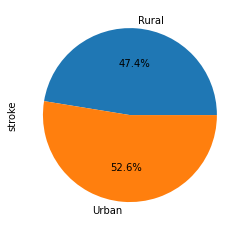

In [31]:
#Proportion based on Residence
Residence=df.groupby(['Residence_type'])['stroke'].sum()
Residence.plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='stroke'>

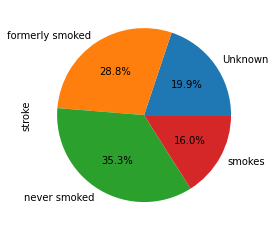

In [32]:
#Smoking status proportion
Smoke=df.groupby(['smoking_status'])['stroke'].sum()
Smoke.plot(kind='pie',autopct='%1.1f%%')

# Chi-square test for independence of the attributes
**Categorical data analysis**

**Checking independence of work type and hypertension**

In [33]:
from scipy import stats
import scipy.stats.distributions as dist

In [34]:
pd.crosstab(brn.work_type,brn.hypertension)

hypertension,0,1
work_type,,
Govt_job,482,47
Private,2201,173
Self-employed,547,88
children,642,0


In [35]:
ct = np.array([[482,47], [2201, 173],[547,88],[642,0]])
stats.chi2_contingency(ct)

(92.05697156622884,
 7.919433525458353e-20,
 3,
 array([[ 490.02105263,   38.97894737],
        [2199.07368421,  174.92631579],
        [ 588.21052632,   46.78947368],
        [ 594.69473684,   47.30526316]]))

In [36]:
d=pd.DataFrame(stats.chi2_contingency(ct))
d.index=["test statistic","P-value","d.f.","expected fre"]
d.columns=["Results"]
d

,Results
test statistic,92.056972
P-value,0.0
d.f.,3
expected fre,"[[490.0210526315789, 38.97894736842105], [2199..."


In [37]:
print("Ho:Hypertension and work_type are independent\n")
print("Ha:Hypertension and work_type are dependent\n")
print("Since p-value < 0.05, null hypothesis Ho is rejected at 5% level of significance\n")
print("Conclusion: The attributes hypertension and work type are dependent")

Ho:Hypertension and work_type are independent

Ha:Hypertension and work_type are dependent

Since p-value < 0.05, null hypothesis Ho is rejected at 5% level of significance

Conclusion: The attributes hypertension and work type are dependent


**Checking independence of residence type and smoking status**

In [38]:
pd.crosstab(brn.Residence_type,brn.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
Residence_type,,,,
Rural,670,332,772,292
Urban,674,344,749,347


In [39]:
t = np.array([[670,332,772,292], [674,344,749,347]])
stats.chi2_contingency(t)

(4.756110319227584,
 0.1905521865030298,
 3,
 array([[664.28325359, 334.11866029, 751.76698565, 315.83110048],
        [679.71674641, 341.88133971, 769.23301435, 323.16889952]]))

In [40]:
d1=pd.DataFrame(stats.chi2_contingency(ct))
d1.index=["test statistic","P-value","d.f.","expected fre"]
d1.columns=["Results"]
d1

,Results
test statistic,92.056972
P-value,0.0
d.f.,3
expected fre,"[[490.0210526315789, 38.97894736842105], [2199..."


In [41]:
print("Ho:Residence type and Smoking status are independent\n")
print("Ha:Residence type and Smoking status are dependent\n")
print("Since p-value < 0.05, null hypothesis Ho is rejected at 5% level of significance\n")
print("Conclusion: The attributes Residence type and Smoking status are dependent")

Ho:Residence type and Smoking status are independent

Ha:Residence type and Smoking status are dependent

Since p-value < 0.05, null hypothesis Ho is rejected at 5% level of significance

Conclusion: The attributes Residence type and Smoking status are dependent


# Decoding the categorical variables 

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
brn['gender']=encoder.fit_transform(df['gender'])
brn['Residence_type']=encoder.fit_transform(df['Residence_type'])
brn['work_type']=encoder.fit_transform(df['work_type'])
brn['smoking_status']=encoder.fit_transform(df['smoking_status'])
brn['ever_married']=encoder.fit_transform(df['ever_married'])

In [43]:
brn.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
5,1,74.0,1,1,1,1,0,70.09,27.4,2,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
7,0,78.0,0,0,1,1,1,58.57,24.2,0,1
8,0,81.0,1,0,1,1,0,80.43,29.7,2,1


<AxesSubplot:>

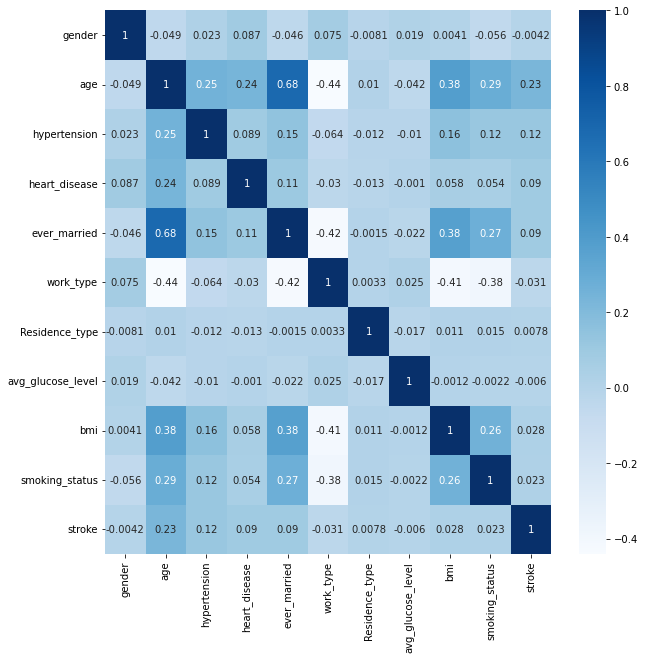

In [44]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(brn.corr(), ax = ax, annot = True,cmap = 'Blues')

# Data splitting as dependent(y) and independent(x):

In [45]:
x=brn.drop(columns="stroke",axis=1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,1,80.0,0,1,1,1,0,105.92,32.5,2
5,1,74.0,1,1,1,1,0,70.09,27.4,2
6,0,69.0,0,0,0,1,1,94.39,22.8,2
7,0,78.0,0,0,1,1,1,58.57,24.2,0
8,0,81.0,1,0,1,1,0,80.43,29.7,2


In [46]:
y=brn["stroke"]
y.head()

1    1
5    1
6    1
7    1
8    1
Name: stroke, dtype: int64

# **Checking and Balancing the Data**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

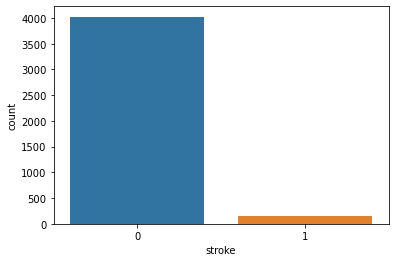

In [47]:
sns.countplot(brn.stroke)

**From the above barplot, it seems that the data is not balanced<br><br>
To balance the Data:**

In [48]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [49]:
oversample = SMOTE()
x_rus,y_rus=oversample.fit_resample(x,y)
print(sorted(Counter(y_rus).items()))

[(0, 4024), (1, 4024)]


**Splitting data as train and test**

In [50]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, 
                            test_size=0.2, random_state=11)

In [51]:
x_train.shape,x_test.shape

((6438, 10), (1610, 10))

In [52]:
x_train.shape,x_test.shape

((6438, 10), (1610, 10))

# Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# ML models 

# 1.Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score


In [55]:
model_lg=LogisticRegression()
model_lg.fit(x_train,y_train)

LogisticRegression()

In [56]:
pred_lg=model_lg.predict(x_test)

In [57]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_lg})  
df

,Actual,Predicted
7463,1,0
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,1
613,0,0
1534,0,0


In [58]:
Accuracy_lg=accuracy_score(y_test,pred_lg)
Accuracy_lg

0.7937888198757764

In [59]:
Precision_lg=precision_score(y_test,pred_lg)
Precision_lg

0.7818831942789034

In [60]:
Recall_lg=recall_score(y_test,pred_lg)
Recall_lg

0.8149068322981367

In [61]:
confusion_matrix(y_test,pred_lg)

array([[622, 183],
       [149, 656]], dtype=int64)

# 2. Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_t=DecisionTreeClassifier()

In [63]:
model_t.fit(x_train,y_train)


DecisionTreeClassifier()

In [64]:
pred_t=model_t.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_t})  
df

,Actual,Predicted
7463,1,1
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,0
613,0,0
1534,0,0


In [65]:
Accuracy_t=accuracy_score(y_test,pred_t)
Accuracy_t

0.931055900621118

In [66]:
Precision_t=precision_score(y_test,pred_t)
Precision_t

0.9130952380952381

In [67]:
Recall_t=recall_score(y_test,pred_t)
Recall_t

0.9527950310559006

In [68]:
confusion_matrix(y_test,pred_t)

array([[732,  73],
       [ 38, 767]], dtype=int64)

In [69]:
brn.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [70]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
an=["0","1"]

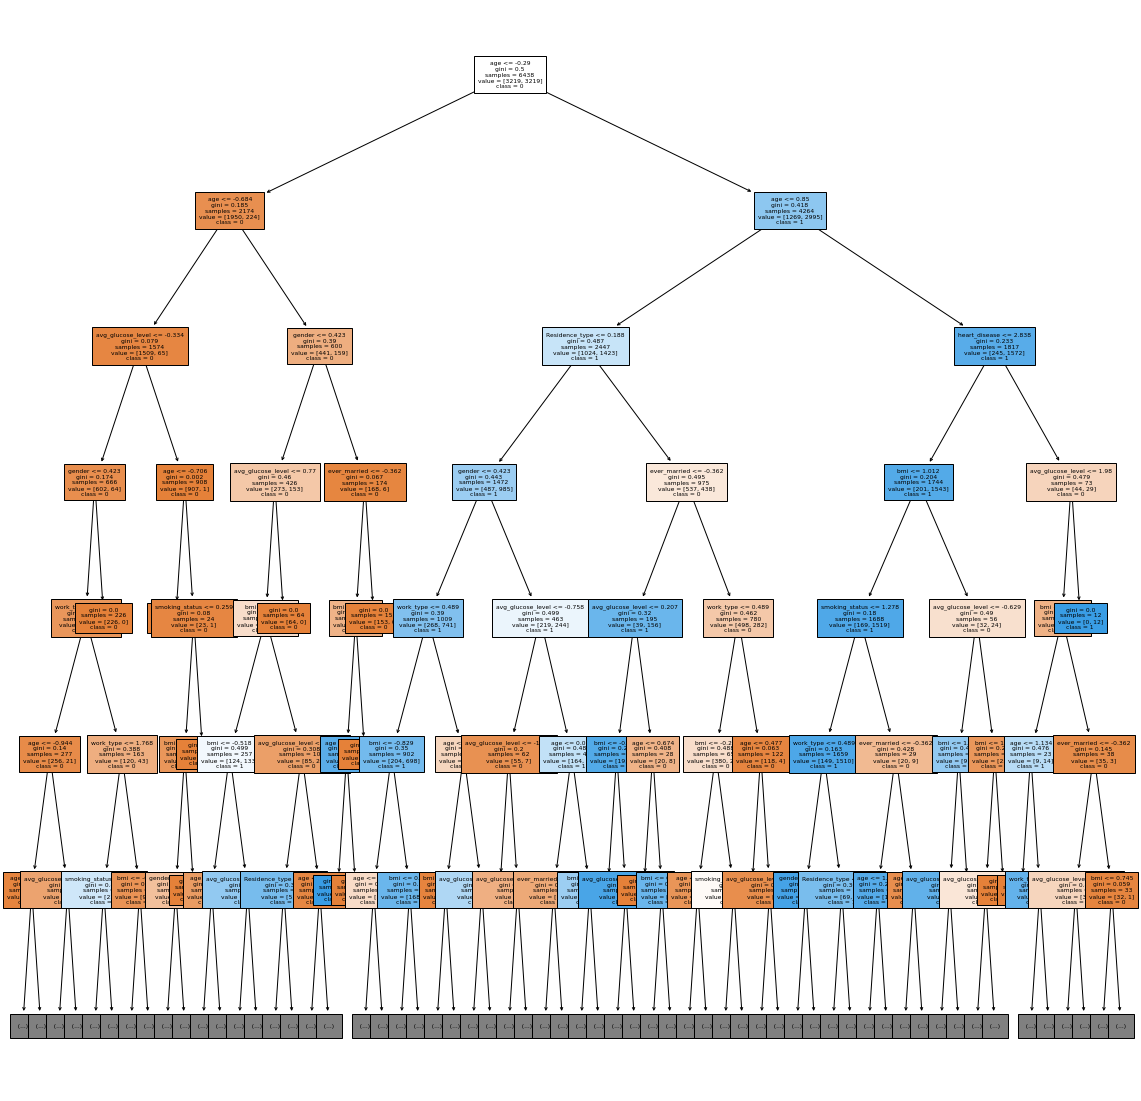

In [71]:
plt.figure(figsize=(20,20))
s=plot_tree(model_t,feature_names=features,class_names=an,max_depth=6,fontsize=6,filled=True)
plt.show()

# 3.K-Neighbors Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model_kn=KNeighborsClassifier(n_neighbors=5)

In [73]:
model_kn.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
pred_kn=model_kn.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_kn})  
df

,Actual,Predicted
7463,1,1
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,1
613,0,0
1534,0,0


In [75]:
Accuracy_kn=accuracy_score(y_test,pred_kn)
Accuracy_kn

0.8807453416149068

In [76]:
Precision_kn=precision_score(y_test,pred_kn)
Precision_kn

0.827807486631016

In [77]:
Recall_kn=recall_score(y_test,pred_kn)
Recall_kn

0.9614906832298137

In [78]:
confusion_matrix(y_test,pred_kn)

array([[644, 161],
       [ 31, 774]], dtype=int64)

# 4.Gaussian NB

In [79]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()

In [80]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [81]:
pred_nb=model_nb.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_nb})  
df

,Actual,Predicted
7463,1,1
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,1
613,0,0
1534,0,0


In [82]:
Accuracy_nb=accuracy_score(y_test,pred_nb)
Accuracy_nb

0.7850931677018633

In [83]:
Precision_nb=precision_score(y_test,pred_nb)
Precision_nb

0.7418335089567967

In [84]:
Recall_nb=recall_score(y_test,pred_nb)
Recall_nb

0.8745341614906832

In [85]:
confusion_matrix(y_test,pred_nb)

array([[560, 245],
       [101, 704]], dtype=int64)

# 5.Support Vector Machine

In [86]:
from sklearn.svm import SVC

In [87]:
model_svm=SVC()
model_svm.fit(x_train,y_train)

SVC()

In [88]:
pred_svm=model_svm.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_svm})  
df

,Actual,Predicted
7463,1,1
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,1
613,0,0
1534,0,0


In [89]:
Accuracy_svm=accuracy_score(y_test,pred_svm)
Accuracy_svm

0.8732919254658386

In [90]:
Precision_svm=precision_score(y_test,pred_svm)
Precision_svm

0.8387824126268321

In [91]:
Recall_svm=recall_score(y_test,pred_svm)
Recall_svm

0.924223602484472

In [92]:
confusion_matrix(y_test,pred_svm)

array([[662, 143],
       [ 61, 744]], dtype=int64)

# 6.Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
pred_rf=model_rf.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_rf})  
df

,Actual,Predicted
7463,1,1
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,1
613,0,0
1534,0,0


In [96]:
Accuracy_rf=accuracy_score(y_test,pred_rf)
Accuracy_rf

0.9503105590062112

In [97]:
Precision_rf=precision_score(y_test,pred_rf)
Precision_rf

0.9310344827586207

In [98]:
Recall_rf=recall_score(y_test,pred_rf)
Recall_rf

0.9726708074534162

In [99]:
confusion_matrix(y_test,pred_rf)

array([[747,  58],
       [ 22, 783]], dtype=int64)

# 7.Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
model_g=GradientBoostingClassifier()
model_g.fit(x_train,y_train)

GradientBoostingClassifier()

In [102]:
pred_g=model_g.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_g})  
df

,Actual,Predicted
7463,1,1
6574,1,1
109,1,1
680,0,0
1762,0,0
...,...,...
6649,1,1
7388,1,1
613,0,0
1534,0,0


In [103]:
Accuracy_g=accuracy_score(y_test,pred_g)
Accuracy_g

0.8857142857142857

In [104]:
Precision_g=precision_score(y_test,pred_g)
Precision_g

0.8623103850641773

In [105]:
Recall_g=recall_score(y_test,pred_g)
Recall_g

0.9180124223602485

In [106]:
confusion_matrix(y_test,pred_g)

array([[687, 118],
       [ 66, 739]], dtype=int64)

In [107]:
dct={"Models":("Logistic regression","Decision Tree Classifier","K_neighbors","Naive_bayes","SVM","Random_forest","Gradient boosting"),
    "Accuracy_Score":(Accuracy_lg,Accuracy_t,Accuracy_kn,Accuracy_nb,Accuracy_svm,Accuracy_rf,Accuracy_g),
    "precision_Score":(Precision_lg,Precision_t,Precision_kn,Precision_nb,Precision_svm,Precision_rf,Precision_g),
     "Recall_Score":(Recall_lg,Recall_t,Recall_kn,Recall_nb,Recall_svm,Recall_rf,Recall_g)}

In [108]:
df=pd.DataFrame(dct)
df

,Models,Accuracy_Score,precision_Score,Recall_Score
0,Logistic regression,0.793789,0.781883,0.814907
1,Decision Tree Classifier,0.931056,0.913095,0.952795
2,K_neighbors,0.880745,0.827807,0.961491
3,Naive_bayes,0.785093,0.741834,0.874534
4,SVM,0.873292,0.838782,0.924224
5,Random_forest,0.950311,0.931034,0.972671
6,Gradient boosting,0.885714,0.862310,0.918012


Text(0.5, 1.0, 'Models verses scores')

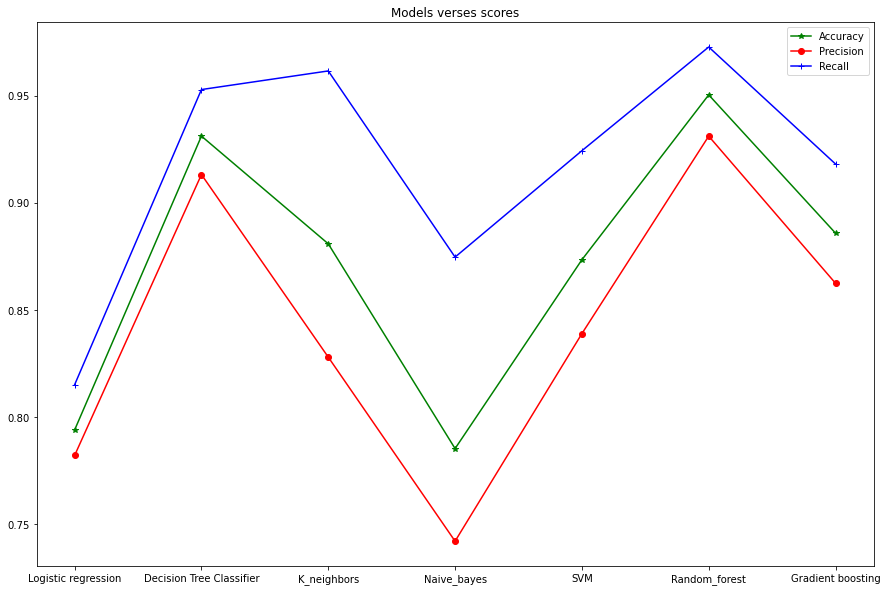

In [109]:
plt.figure(figsize=(15,10))
plt.plot(df["Models"],df["Accuracy_Score"],"g",label="Accuracy",marker="*")
plt.plot(df["Models"],df["precision_Score"],"r",label="Precision",marker="o")
plt.plot(df["Models"],df["Recall_Score"],"b",label="Recall",marker="+")
plt.legend()
plt.title("Models verses scores")


# FEATURE importance:

<AxesSubplot:title={'center':'feture importance'}>

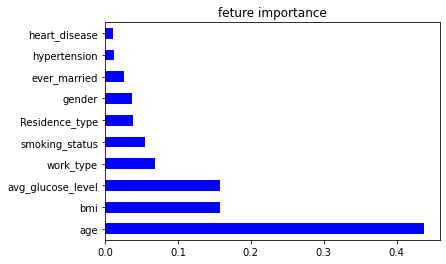

In [110]:
index=brn.columns[:-1]
importance=pd.Series(model_rf.feature_importances_,index=index)
importance.nlargest(10).plot(kind="barh",colormap="winter",title="feture importance")

# Conclusions:
Considering the accuracy score and precision score, Random forest is the best model.
Considering the Recall score, K_Neighbors classifier is best.

Overall, Random forest is the best fitted model.

In [111]:
brn.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Checking for random inputs**

In [112]:
gender=int(input("Enter gender of person:"))
age=float(input("Enter age of person:"))
hypertension=int(input("Enter:"))
heart_disease=int(input("Enter :"))
ever_married=int(input("Enter :"))
work_type=int(input("Enter :"))
Residence_type=int(input("Enter :"))
avg_glucose_level=float(input("Enter :"))
bmi=float(input("Enter :"))
smoking_status=int(input("Enter smoking status:"))
pred=model_rf.predict([[gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status]])
print(pred)
if pred==1:
    print("Person may have brain stroke")
else:
        print("Person has good health")

Enter gender of person:1
Enter age of person:40
Enter:1
Enter :0
Enter :1
Enter :3
Enter :1
Enter :50
Enter :24
Enter smoking status:0
[0]
Person has good health


# <center>  Thank You! <center>